In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import sys
import os
sys.path.append(os.path.abspath(".."))
import packages.Preprocesamiento as ppr

In [182]:
df = ppr.cargar_objeto(nombre='comentarios_hoteles_nlp_limpios', origen='trf')
df = pd.DataFrame(df)

In [183]:
#Paleta de colores
paleta_colores = ['#7DBFB3','#644D44', '#AFBE84', '#C2A18A', '#B17C81']

C:\Users\X1404\AppData\Local\Temp\ipykernel_5184\2765486648.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='nota', bins=10, kde=True, palette=paleta_colores)


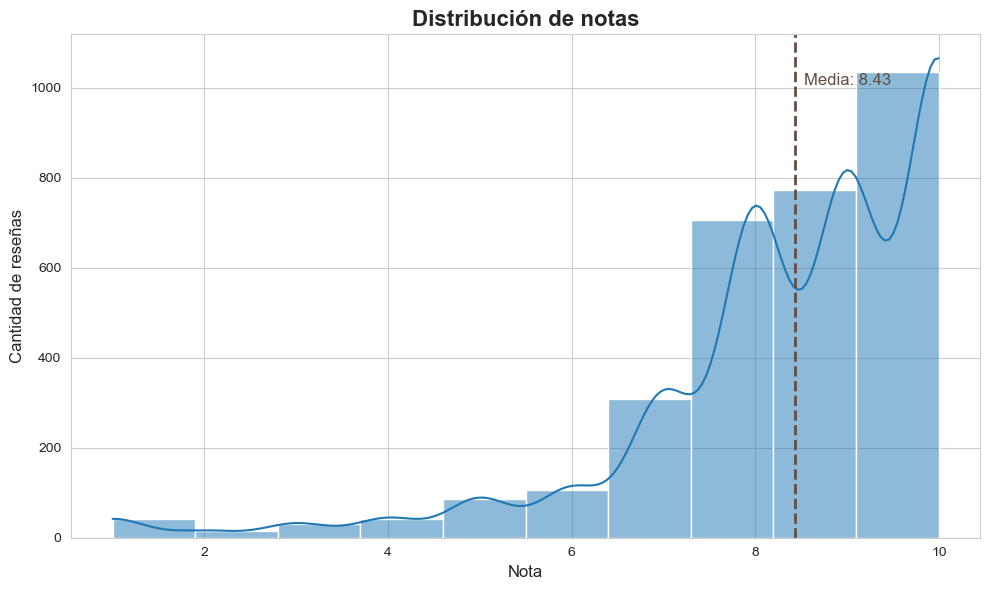

In [ ]:
# Grafico 1
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='nota', bins=10, kde=True, palette=paleta_colores)
plt.title('Distribución de notas', fontsize=16, weight='bold')
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Cantidad de reseñas', fontsize=12)
media_nota = df['nota'].mean()
plt.axvline(media_nota, color='#644D44', linestyle='--', linewidth=2)
plt.text(media_nota + 0.1, plt.gca().get_ylim()[1]*0.9, f'Media: {media_nota:.2f}', color='#644D44', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\X1404\AppData\Local\Temp\ipykernel_5184\1154009077.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hotel', y='nota', palette=paleta_colores)
C:\Users\X1404\AppData\Local\Temp\ipykernel_5184\1154009077.py:4: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='hotel', y='nota', palette=paleta_colores)


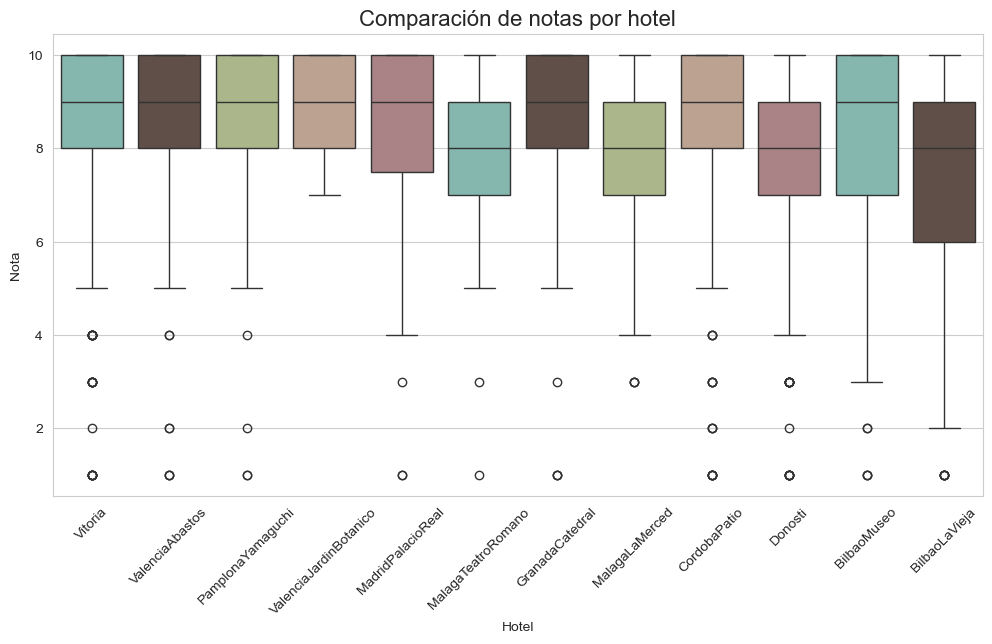

In [185]:
# Grafico 2
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='hotel', y='nota', palette=paleta_colores)
plt.xticks(rotation=45)
plt.title('Comparación de notas por hotel', fontsize=16)
plt.ylabel('Nota')
plt.xlabel('Hotel')
plt.show()

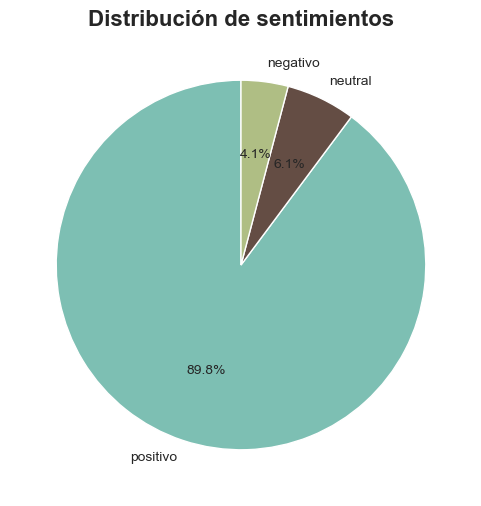

In [199]:
# Grafico 3
df_count = df['sentimiento'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(df_count,labels=df_count.index,autopct="%1.1f%%",colors=paleta_colores,startangle=90)
plt.title("Distribución de sentimientos", fontsize=16, weight='bold')
plt.show()

C:\Users\X1404\AppData\Local\Temp\ipykernel_5184\164740973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="sentimiento",y="nota",data=df,palette=paleta_colores,inner="quartile")
C:\Users\X1404\AppData\Local\Temp\ipykernel_5184\164740973.py:4: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax = sns.violinplot(x="sentimiento",y="nota",data=df,palette=paleta_colores,inner="quartile")


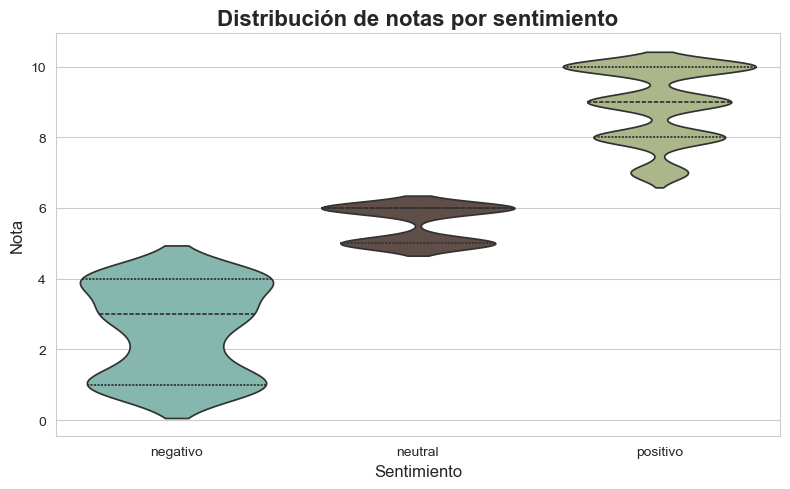

In [187]:
# Grafico 4
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.violinplot(x="sentimiento",y="nota",data=df,palette=paleta_colores,inner="quartile")
plt.title("Distribución de notas por sentimiento", fontsize=16, weight='bold')
plt.xlabel("Sentimiento", fontsize=12)
plt.ylabel("Nota", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\X1404\AppData\Local\Temp\ipykernel_5184\4171968460.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_media,x="nota",y="hotel", palette=paleta_colores)
C:\Users\X1404\AppData\Local\Temp\ipykernel_5184\4171968460.py:5: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=df_media,x="nota",y="hotel", palette=paleta_colores)


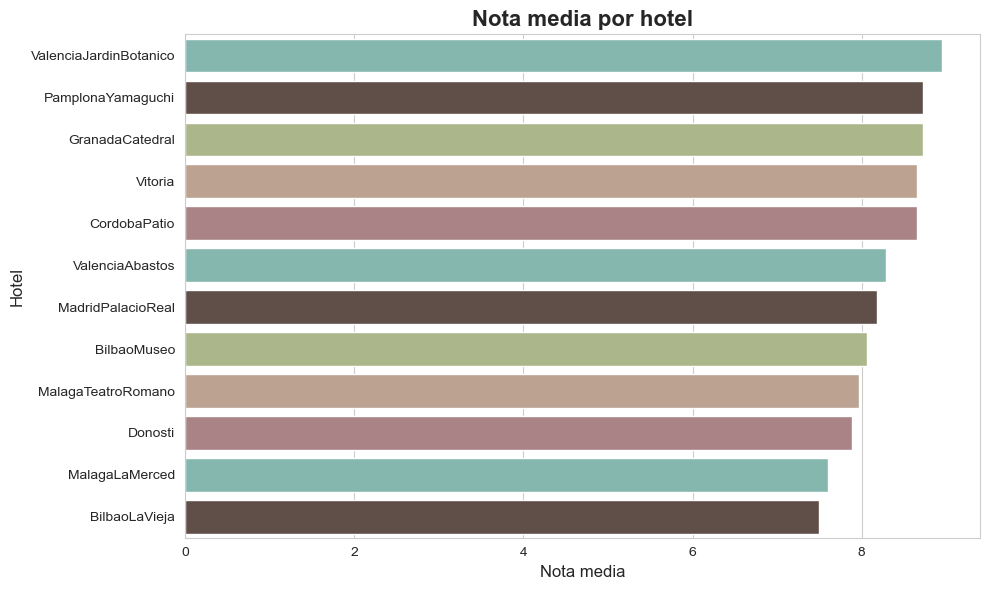

In [ ]:
# Grafico 5
df_media = df.groupby("hotel", as_index=False)["nota"].mean().sort_values("nota", ascending=False)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(data=df_media,x="nota",y="hotel", palette=paleta_colores)
plt.title("Nota media por hotel", fontsize=16, weight='bold')
plt.xlabel("Nota media", fontsize=12)
plt.ylabel("Hotel", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\X1404\AppData\Local\Temp\ipykernel_5184\3727775553.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(["hotel", "sentimiento"]).size().reset_index(name="count")
C:\Users\X1404\AppData\Local\Temp\ipykernel_5184\3727775553.py:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


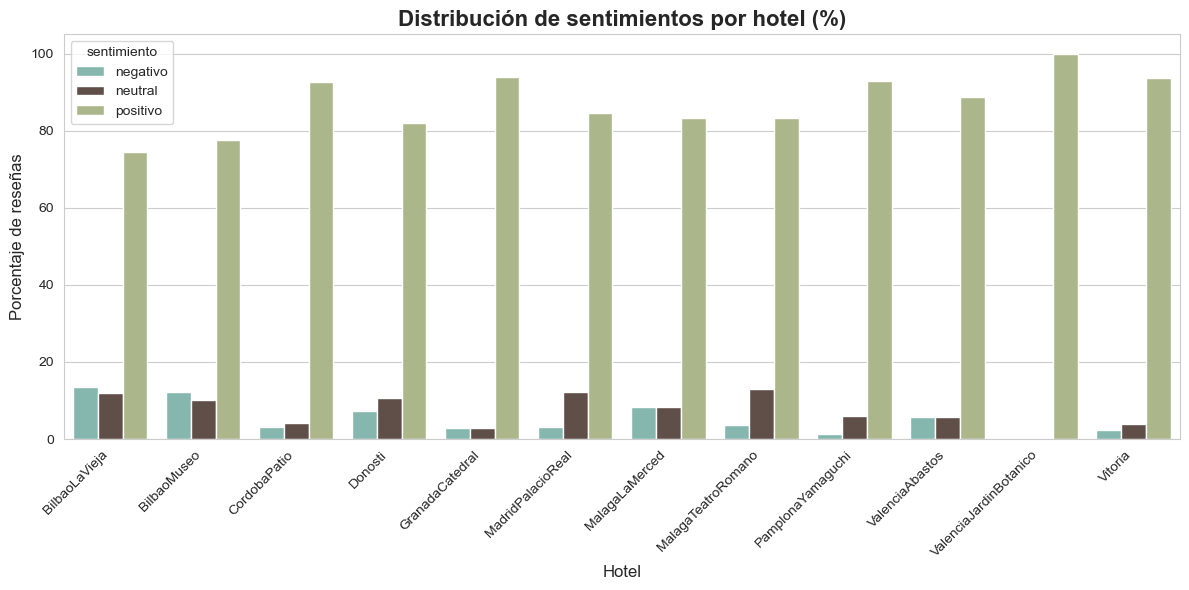

In [ ]:
# Grafico 6
df_plot = df.groupby(["hotel", "sentimiento"]).size().reset_index(name="count")
df_plot['percent'] = df_plot.groupby('hotel')['count'].transform(lambda x: x / x.sum() * 100)

plt.figure(figsize=(12,6))
sns.barplot(data=df_plot,x='hotel',y='percent',hue='sentimiento',palette=paleta_colores)
plt.title("Distribución de sentimientos por hotel (%)", fontsize=16, weight='bold')
plt.xlabel("Hotel", fontsize=12)
plt.ylabel("Porcentaje de reseñas", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\X1404\AppData\Local\Temp\ipykernel_5184\2092687259.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df,x="longitud_texto",y="nota",alpha=0.3, palette=paleta_colores)


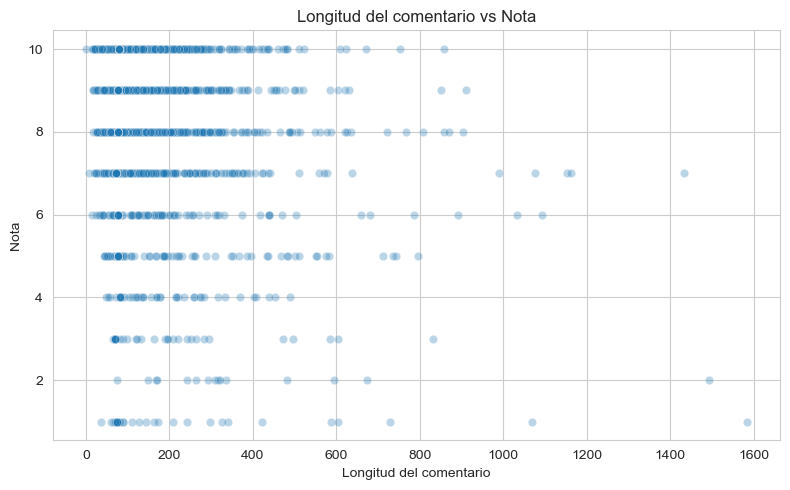

In [200]:
# Grafico 7
df["longitud_texto"] = df["comentarios_limpios"].str.len()
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df,x="longitud_texto",y="nota",alpha=0.3, palette=paleta_colores)
plt.title("Longitud del comentario vs Nota")
plt.xlabel("Longitud del comentario")
plt.ylabel("Nota")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Motivos de viaje mas comunes (palabras comunes en tags)')

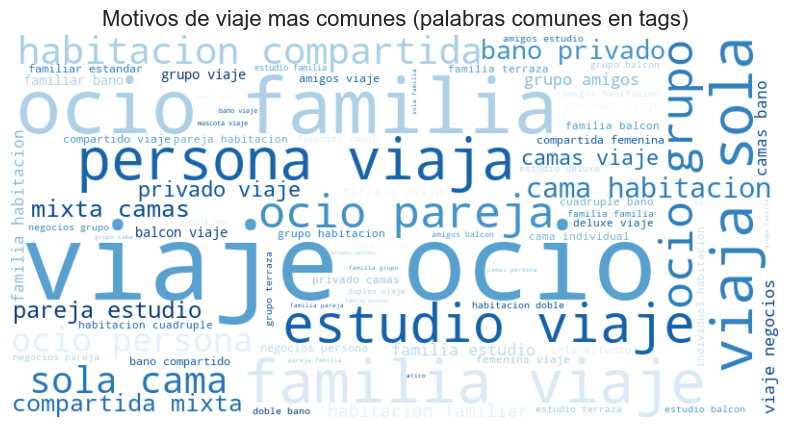

In [198]:
# Grafico 8
texto_tags = " ".join(df["tags_limpios"].astype(str))
wc_tags = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(texto_tags)
plt.figure(figsize=(10,5))
plt.imshow(wc_tags, interpolation="bilinear")
plt.axis("off")
plt.title("Motivos de viaje mas comunes (palabras comunes en tags)", fontsize=16)